# Python Demo - Neural Network Predictions

### Reference:
[Python AI: How to Build a Neural Network & Make Predictions @ Real Python .com]
URL=https://realpython.com/lessons/build-neural-network-ai-overview/

1. Vector Dot Product:

    - Simple 2D example:

In [3]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

print(f'The dot product is: {dot_product_1}')

The dot product is: 2.1672


2. Vector Dot Product Using Numpy: 

    - Using Numpy: Much easier and scaleable for > 2D vectors
    
    - More similar the vectors the bigger the dot product
    
    - Less similar the vectors the closer the dot product is to zero

In [4]:
import numpy as np

In [5]:
dot_product_1 = np.dot(input_vector, weights_1)

print(f'The dot product is: {dot_product_1}')

The dot product is: 2.1672


In [6]:
dot_product_2 = np.dot(input_vector, weights_2)

print(f'The dot product is: {dot_product_2}')

The dot product is: 4.1259999999999994


3. Make a prediction

    - Assume predictions/outputs are classified as 0 or 1
    - Use Sigmoid activation function
    - Assume predictions >= .5 round up to 1
    - Assume predictions < .5 round down to 0
    - Introducing use of numpy arrays
    - Using a 'layer' to compute the dot product and add bias
    - Using a second 'layer' to apply the Sigmoid function

Expecting predicted output of '1' below and get it by rounding result up to 1.

In [7]:
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
    layer_1 = np.dot(input_vector, weights) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f'The prediction result is: {prediction}')

The prediction result is: [0.7985731]


Expecting predicted output of '0' below but get a result that would round to 1 not 0.

In [8]:
input_vector = np.array([2, 1.5])

prediction = make_prediction(input_vector, weights_1, bias)

print(f'The prediction result is: {prediction}')

The prediction result is: [0.87101915]


4.  Measuring Error

    - Need measure of error to determine 'how far off' predicions are from expected (target) values.
    - Use 'cost' or 'loss' function like Simple Mean Squared Error (MSE)
    - Basically, (prediction - target)**2
    - Squaring eliminates negative error values and emphasizes larger differences over smaller differences.

Calculate the error of prediction when our expected (target) value was zero.

In [22]:
target = 0

mse = np.square(prediction - target)

print(f'Prediction: {prediction}; Error: {mse}')

Prediction: [0.87101915]; Error: [0.75867436]


5. Now want to reduce the cost of the error

    - Use the derivative of the cost function to determine the direction to adjust the weigth values
    - This is also referred to the gradient descent process
    - The derivative of the MSE is given below

In [23]:
derivative = 2 * (prediction - target)

print(f'The derivative is: {derivative}')

The derivative is: [1.7420383]


6. Adjust the weight value to reduce the error

    - Assume weight must be reduced b/c prediction was too high
    - Reduce weight by subtracting derivative value
    - Recalculate the prediction using the adjusted weight
    - Check the MSE to make sure it is lower cost

In [24]:
weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector, weights_1, bias)

error = np.square(prediction - target)

print(f'Prediction: {prediction}; Error: {error}')

Prediction: [0.01496248]; Error: [0.00022388]


In the above case, the prediction is below 0.5 and the error is much smaller.  

    - We were lucky in this case, the derivative could have been a larger value, which could cause the error to 'skip' over the minimum and increase  
    - In that case you should increase/decrease the weight by a fraction of the derivative 
    - Using a fraction of the derivative requires taking 'smaller steps' in reducing the error 
    - This fraction is called the learning rate (alpha), examples to experiment with are .1, .01, .001, etc.

Unfortunately, when we use the updated weights on the first input sample as shown below, the predicted value is now wrong!  Even though the prediction is now wrong, the error is small.

In [25]:
input_vector = np.array([1.66, 1.56])

prediction = make_prediction(input_vector, weights_1, bias)

error = np.square(prediction - target)

print(f'Prediction: {prediction}; Error: {error}')

Prediction: [0.01431593]; Error: [0.00020495]


A technique to avoid 'overfitting':

- Overfitting is when the model predicts very well with the training data but not with other (real world) data.
- Next technique will use partial derivatives and chain rule to implement 'back propagation' to adjust the weights and bias of a Neural Network model.

7. Implementation of a Neural Network Class

    - Weights and Bias are parameters
    - Learning rate is a 'hyper-parameter' (set as a constant at initialization)
    - Utilizing back-propagation instead of simple derivative to update weights and bias to minimize cost/error.

In [27]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            derror_dbias, derror_dweights = self._compute_gradients(input_vector, target)

            self._update_parameters(derror_dbias, derror_dweights)

            if current_iteration % 100 == 0:
                cumulative_error = 0
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

8. Using the Neural Network Class

    - Input data is defined
    - The Neural Network model is created
    - The predict method is invoked
    - The below code just makes a prediction
    - No training is performed

In [28]:
input_vector = np.array([2, 1.5])
learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

0.1831047011102152

9. Training the Neural Network Model

    - Training data input is defined
    - Predictions (target data) is defined
    - A learning rate is set
    - The Neural Network model is created
    - The train method is invoked to train the model

In [29]:
input_vectors = np.array([[3, 1.5], [2, 1], [4, 1.5], [3, 4], [3.5, 0.5], [2, 0.5], [5.5, 1], [1, 1]])

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

10. Plotting results
    
    - Shows model error over many interations as it is being trained.

Text(0, 0.5, 'Error for all training instances')

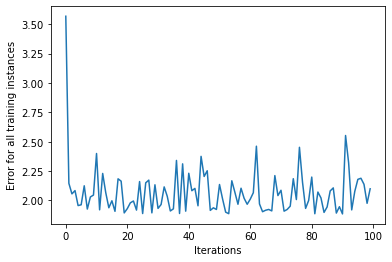

In [31]:
import matplotlib.pyplot as plt

plt.plot(training_error)
plt.xlabel('Iterations')
plt.ylabel('Error for all training instances')

### Proceed ONLY if you intend to share this notebook on JOVIAN...

In [9]:
# import jovian
# jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/wlabagnara/py-demo-nn-preds


'https://jovian.ai/wlabagnara/py-demo-nn-preds'